<a href="https://colab.research.google.com/github/AnaClarice382/data_science_analysis/blob/master/EDA_Oferta_Relampago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
import warnings                                 
warnings.filterwarnings('ignore')

### Data manipulation ###
import pandas as pd
import numpy as np

### Viz ###
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly.subplots import make_subplots
import plotly.express as px

### Models and metrics to time series ###
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

#EDA - Oferta Relampago
---
##Objetivo: Gerar insights
---
**Descritivas**
  * Qual categoria possui mais oferta? 
  * Qual categoria vende mais em quantidade? 
  * Qual categoria vende mais em valor?
  * Qual vertical possui mais oferta?
  * Qual vertical vende mais em quantidade? 
  * Qual vertical vende mais em valor?

**Criação de novas colunas**
  * Qual o horário que ocorre mais vendas?
  * Qual categoria foi mais vendido no menor intervalo de oferta?
  * Qual é o dia da semana que ocorre mais vendas?
  * Quantas ficaram com estoque negativo depois do termino da oferta ?
  * Ofertas que vendem mais tem o intervalo de tempo menor?
  * Quantidade de itens vendidos tem relação com a entrega grátis? 
  * Dia da semana pode está relacionado com maiores vendas? [dumizar]
  * O horário pode está relacionado com maiores vendas? [Categorizar][dumizar]
  * Quantidade de itens vendidos tem relação com qtde de ofertas? [dumizar]

**Detecção de anomalias**
  * Distribuição de valor vendido e quantidade vendida por categoria

Conhecendo o dataframe

| Coluna | Descrição |
|--------|-----------|
|OFFER_START_DATE| Data de inicio da oferta|
|OFFER_START_DTTM| Data/Hora inicio da oferta|
|OFFER_FINISH_DTTM| Data/Hora fim da oferta|
|OFFER_TYPE| Tipo da oferta|
|INVOLVED_STOCK| Estoque |
|REMAINING_STOCK_AFTER_END| Estoque ao final da oferta |
|SOLD_AMOUNT| Valor vendido|
|SOLD_QUANTITY| Quantidade vendida|
|ORIGIN| Origem|
|SHIPPING_PAYMENT_TYPE| Tipo do envio|
|DOM_DOMAIN_AGG1| Categoria|
|VERTICAL| Vertical |
|DOMAIN_ID| Algo como Id Categoria|

## Descritivas

In [114]:
df = pd.read_csv("/content/ofertas_relampago.csv")
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


In [115]:
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [ ]:
df['ORIGIN'].value_counts()

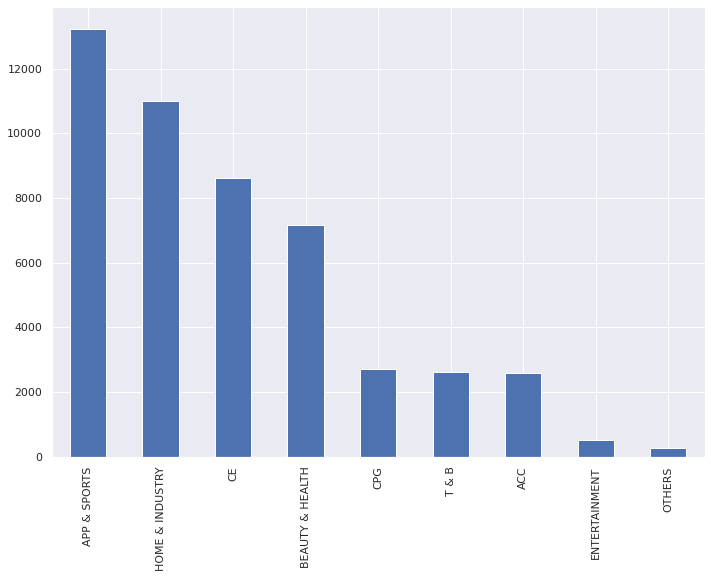

In [168]:
df['VERTICAL'].value_counts().plot.bar()

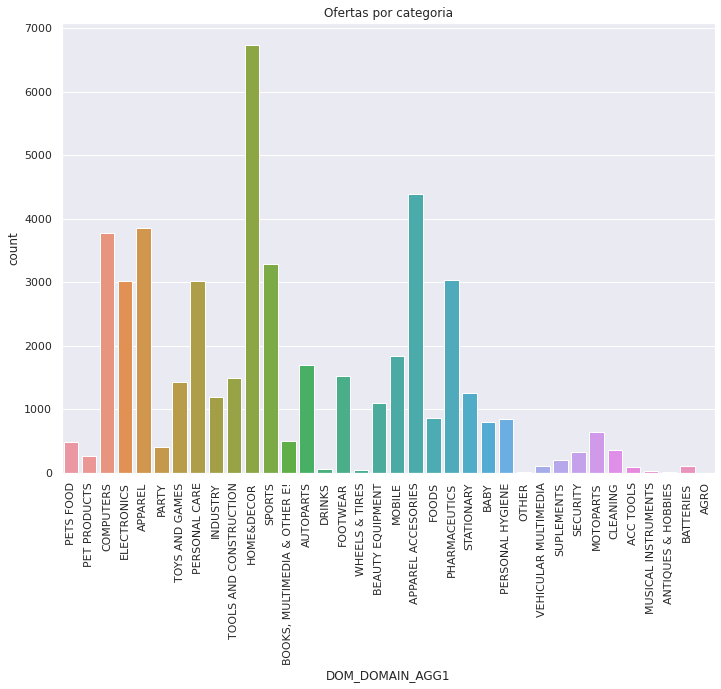

In [116]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.countplot(x='DOM_DOMAIN_AGG1', data= df)
ax.set_title('Ofertas por categoria')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
plt.show()

Legal, a HOME&DECOR é a categoria que tem mais ofertas, mas será que é a categoria mais vendida? 



In [117]:
print('Quantidade vendida da categoria HOME&DECOR: ', int(df[df['DOM_DOMAIN_AGG1']=='HOME&DECOR']['SOLD_QUANTITY'].sum()))
print('Valor total das vendas da categoria HOME%DECOR: ',df[df['DOM_DOMAIN_AGG1']=='HOME&DECOR']['SOLD_AMOUNT'].sum())

Quantidade vendida da categoria HOME&DECOR:  18269
Valor total das vendas da categoria HOME%DECOR:  87761.65


In [118]:
df_agg_sum = df.groupby('DOM_DOMAIN_AGG1')[['SOLD_AMOUNT','SOLD_QUANTITY']].sum().sort_values(by="SOLD_AMOUNT", ascending=False)

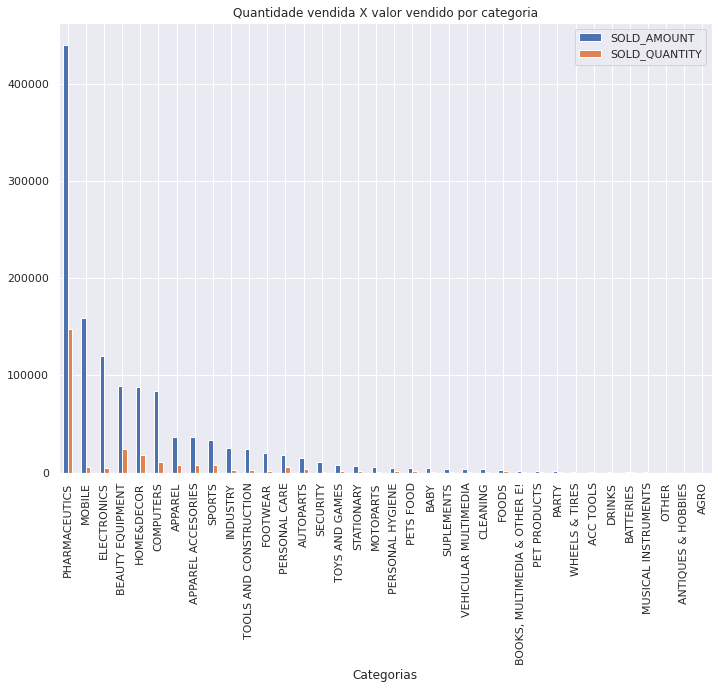

In [119]:
ax = df_agg_sum.plot.bar(title="Quantidade vendida X valor vendido por categoria")
ax.set_xlabel('Categorias')
plt.show()

In [120]:
sum_solded_quantity = df['SOLD_QUANTITY'].sum()
sum_solded_amount = df['SOLD_AMOUNT'].sum()

df_agg_sum['OFFERS_QUANTITY'] = df['DOM_DOMAIN_AGG1'].value_counts()
df_agg_sum['PERCENTUAL_QUANTITY'] = ((df_agg_sum['SOLD_QUANTITY'] / sum_solded_quantity) * 100)
df_agg_sum['PERCENTUAL_AMOUNT'] = ((df_agg_sum['SOLD_AMOUNT'] / sum_solded_amount) * 100)

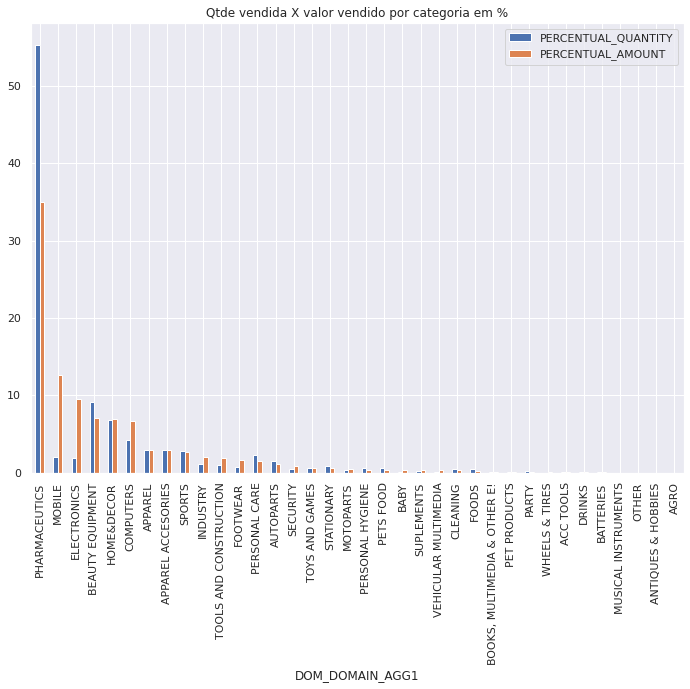

In [121]:
df_agg_sum[['PERCENTUAL_QUANTITY',"PERCENTUAL_AMOUNT"]].plot.bar(title="Qtde vendida X valor vendido por categoria em %")

In [122]:
percentual_pharma = round(df[df['DOM_DOMAIN_AGG1']=='PHARMACEUTICS']['DOM_DOMAIN_AGG1'].count() /  df['DOM_DOMAIN_AGG1'].count() * 100)
print('Tiveram {0} ofertas da categoria PHARMACEUTICS que representa {1}% das ofertas'.format(df[df['DOM_DOMAIN_AGG1']=='PHARMACEUTICS']['DOM_DOMAIN_AGG1'].count(), percentual_pharma))
print('Quantidade vendida da categoria PHARMACEUTICS: {0}. Quantidade vendida total: {1}'.format(int(df[df['DOM_DOMAIN_AGG1']=='PHARMACEUTICS']['SOLD_QUANTITY'].sum()), int(sum_solded_quantity)))
print('Valor total das vendas da categoria PHARMACEUTICS: {0}. Valor vendido total: {1}'.format(np.round(df[df['DOM_DOMAIN_AGG1']=='PHARMACEUTICS']['SOLD_AMOUNT'].sum(), decimals=2), np.round(sum_solded_amount, decimals=2)))

Tiveram 3035 ofertas da categoria PHARMACEUTICS que representa 6% das ofertas
Quantidade vendida da categoria PHARMACEUTICS: 147697. Quantidade vendida total: 266708
Valor total das vendas da categoria PHARMACEUTICS: 440216.74. Valor vendido total: 1258663.5


TOP 10 Categorias que menos venderam em quantidade

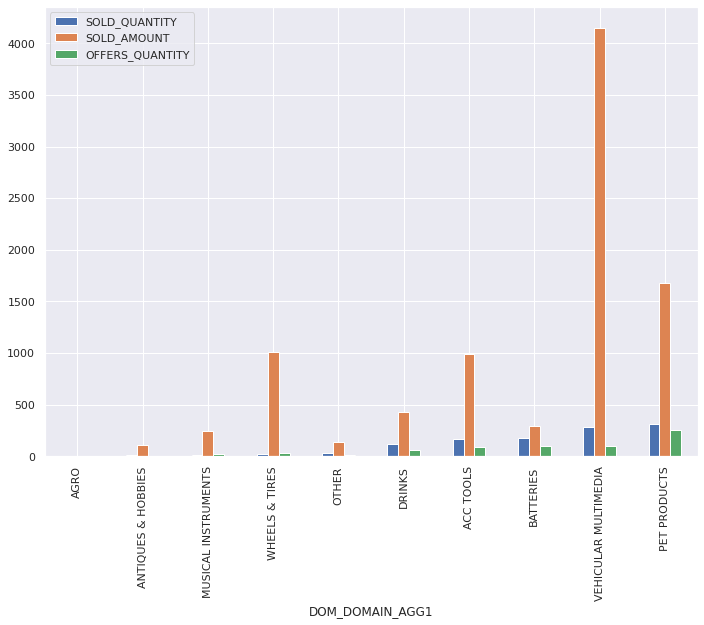

In [123]:
df_agg_sum[['SOLD_QUANTITY', 'SOLD_AMOUNT','OFFERS_QUANTITY']].sort_values(by='SOLD_QUANTITY', ascending=True).iloc[0:10].plot.bar()

In [169]:
df_agg_sum[['SOLD_QUANTITY', 'SOLD_AMOUNT','OFFERS_QUANTITY']].sort_values(by='SOLD_QUANTITY', ascending=True).iloc[0:10]

,SOLD_QUANTITY,SOLD_AMOUNT,OFFERS_QUANTITY
DOM_DOMAIN_AGG1,,,
AGRO,0.0,0.00,1
ANTIQUES & HOBBIES,10.0,113.80,5
MUSICAL INSTRUMENTS,17.0,248.33,27
WHEELS & TIRES,28.0,1007.59,36
OTHER,32.0,136.75,17
DRINKS,119.0,432.01,64
ACC TOOLS,171.0,987.51,95
BATTERIES,183.0,291.35,105
VEHICULAR MULTIMEDIA,288.0,4144.59,104


### Conclusões até aqui...

**Qual categoria possui mais oferta?**

* A categoria que possui mais ofertas é a **HOME&DECOR**, porém apesar de ser a mais ofertada, está apenas no TOP 5 de categorias que gera mais valor.


**Qual categoria vende mais em quantidade?**

* A categoria **PHARMACEUTICS** é a que mais vende em quantidade, e representa mais de 50% da quantidade vendida ao todo, mesmo sendo uma categoria que possui poucas ofertas, cerca de 6%.


**Qual categoria vende mais em valor?**

* A categoria **PHARMACEUTICS** também é a que mais vende em valor, e representa mais que 30% do valor das mercadorias vendidas. 


**Top 10 categorias que venderam menos?**

 * **Agro** foi a categoria que menos vendeu, mas também foi a menos ofertada, com apenas 1 oferta. 
 
|DOM_DOMAIN_AGG1|   SOLD_QUANTITY|	SOLD_AMOUNT|	OFFERS_QUANTITY|
|---------------|---------------|--------------|-------------|	
|AGRO	|0.0	|0.00	|1
|ANTIQUES & HOBBIES|	10.0	|113.80|	5
|MUSICAL INSTRUMENTS|	17.0	|248.33|	27
|WHEELS & TIRES|	28.0|	1007.59|	36
|OTHER	|32.0|	136.75|	17
|DRINKS	|119.0	|432.01|	64
|ACC TOOLS	|171.0|	987.51|	95
|BATTERIES	|183.0	|291.35|	105
|VEHICULAR MULTIMEDIA|	288.0|	4144.59|	104
|PET PRODUCTS|	315.0	|1678.69	|257



## Criação de novas colunas

| Coluna | Descrição |
|--------|-----------|
|OFFER_PERIOD_START| Periodo do dia em que a oferta iniciou|
|OFFER_PERIOD_FINISH| Periodo do dia em que a oferta finalizou|
|FREE_SHIPPING| Indica se a oferta possui ou não entrega grátis|
|NEGATIVE_STOK| Indica se o estoque ficou negativo após o termino da oferta|
|OFFER_DURATION| Indica a duração da oferta |
|DAY_WEEK_OFFER| Indica o dia da semana que houve a oferta |

In [124]:
### function that create a new boolean column in dataframe
def create_new_boolean_column(df, condiction, columnName):
    df.loc[~condiction, columnName] = 0
    df.loc[condiction, columnName] = 1
    df[columnName] = df[columnName].astype(int)

In [125]:
### function that subtract two dates of series and create as column with the difference in hours
def date_difference(df, date1, date2, new_column_name):
    #convert the dates to datetime objects
    date1 = pd.to_datetime(df[date1])
    date2 = pd.to_datetime(df[date2])
    #subtract the dates and convert the result to hours and minutes
    df[new_column_name] = (date2 - date1).astype('timedelta64[h]')

In [126]:
### function that creates a distribution plot
def dist_plot(x, color):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 6)
    sns.distplot(x, bins=100, color=color)

In [127]:
#function that create a new column in dataframe with period of day based on time of day
def period_of_day(df, date_column_name, new_column_name):
    df[new_column_name] = pd.to_datetime(df[date_column_name]).dt.hour.apply(lambda x: 'madrugada' if x < 6 else 'manha' if x < 12 else 'tarde' if x < 18 else 'noite')

In [128]:
### Creating column offer period start and finish
period_of_day(df, 'OFFER_START_DTTM', 'OFFER_PERIOD_START')
period_of_day(df, 'OFFER_FINISH_DTTM', 'OFFER_PERIOD_FINISH')

In [129]:
### Creating column free shipping
create_new_boolean_column(df, df['SHIPPING_PAYMENT_TYPE'] == 'free_shipping', 'FREE_SHIPPING' )

In [130]:
### Creating column negative stok
create_new_boolean_column(df, (df['REMAINING_STOCK_AFTER_END'] < 0),'NEGATIVE_STOK')

In [131]:
### Creating column offer duration
date_difference(df, 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'OFFER_DURATION')

In [132]:
### Creating column day of week offer
df['DAY_WEEK_OFFER'] = pd.to_datetime(df['OFFER_START_DATE']).dt.day_name()

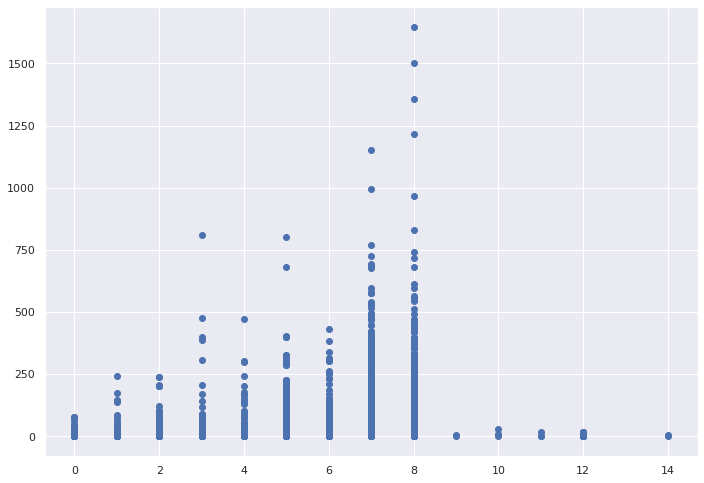

In [145]:
plt.scatter(x=df['OFFER_DURATION'], y=df['SOLD_QUANTITY'])
plt.show() 
#Parece que o horario que mais conseguimos vender mais quantiade é as 8 hrs

In [146]:
df.groupby('OFFER_DURATION').sum()['SOLD_QUANTITY'].sort_values()

OFFER_DURATION
15.0         0.0
104.0        0.0
9.0          7.0
14.0         7.0
11.0        18.0
10.0        39.0
12.0       383.0
0.0       2211.0
1.0       5054.0
2.0       8543.0
3.0      10547.0
4.0      12583.0
5.0      30200.0
6.0      54608.0
8.0      70717.0
7.0      71791.0
Name: SOLD_QUANTITY, dtype: float64

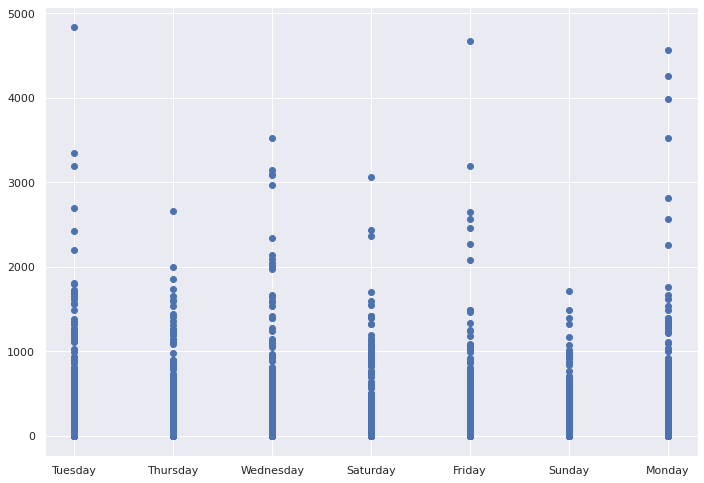

In [134]:
plt.scatter(x=df['DAY_WEEK_OFFER'], y=df['SOLD_AMOUNT'])
plt.show()
#Parece que o dia que menos vendemos é no sabado

In [144]:
df.groupby('DAY_WEEK_OFFER').sum()['SOLD_QUANTITY'].sort_values()

DAY_WEEK_OFFER
Sunday       20220.0
Saturday     29110.0
Friday       38064.0
Thursday     42189.0
Wednesday    44042.0
Monday       44868.0
Tuesday      48215.0
Name: SOLD_QUANTITY, dtype: float64

In [163]:
((df['NEGATIVE_STOK'].value_counts()[1] / df.shape[0]) * 100)
df['NEGATIVE_STOK'].value_counts()

0    47473
1     1273
Name: NEGATIVE_STOK, dtype: int64

In [136]:
dummy = pd.get_dummies(df['DAY_WEEK_OFFER'])
df = pd.concat([df, dummy], axis=1).sort_values(by='OFFER_START_DATE')

In [137]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,FREE_SHIPPING,NEGATIVE_STOK,OFFER_DURATION,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
INVOLVED_STOCK,1.000000,0.994240,0.405859,0.557684,-0.067906,-0.015154,0.099229,-0.000856,0.013595,-0.008948,-0.016223,0.000381,0.006861,0.004811
REMAINING_STOCK_AFTER_END,0.994240,1.000000,0.354320,0.484031,-0.059481,-0.028069,0.101665,-0.000392,0.011961,-0.007206,-0.014547,0.000680,0.005551,0.003557
SOLD_AMOUNT,0.405859,0.354320,1.000000,0.708884,0.068626,-0.003435,0.110627,-0.011622,0.019039,-0.015396,-0.026393,0.000426,0.018636,0.013331
SOLD_QUANTITY,0.557684,0.484031,0.708884,1.000000,-0.112808,0.038405,0.055122,-0.008468,0.023365,-0.022580,-0.029941,0.002771,0.019858,0.012597
FREE_SHIPPING,-0.067906,-0.059481,0.068626,-0.112808,1.000000,-0.132351,0.065073,-0.009890,-0.010946,-0.005692,-0.002345,-0.004338,0.024082,0.008858
NEGATIVE_STOK,-0.015154,-0.028069,-0.003435,0.038405,-0.132351,1.000000,-0.196305,-0.003159,0.006245,-0.016045,-0.012030,0.004952,0.012885,0.006926
OFFER_DURATION,0.099229,0.101665,0.110627,0.055122,0.065073,-0.196305,1.000000,0.003118,-0.008794,-0.006263,-0.014791,0.040612,-0.019566,0.004007
Friday,-0.000856,-0.000392,-0.011622,-0.008468,-0.009890,-0.003159,0.003118,1.000000,-0.167909,-0.185819,-0.160598,-0.182589,-0.183119,-0.174139
Monday,0.013595,0.011961,0.019039,0.023365,-0.010946,0.006245,-0.008794,-0.167909,1.000000,-0.164465,-0.142142,-0.161606,-0.162076,-0.154127
Saturday,-0.008948,-0.007206,-0.015396,-0.022580,-0.005692,-0.016045,-0.006263,-0.185819,-0.164465,1.000000,-0.157304,-0.178844,-0.179363,-0.170567


### Conclusões até aqui...

**As ofertas que tiveram mais vendas duraram quanto tempo?**

  * Podemos dizer que ofertas com duração de 7-8 horas vendem mais. 
  Talvez seja uma regra definida de duração (já conhecida pelo negocio) para um tipo de oferta que vende mais.

|Duração da oferta | Quantidade de itens vendidos|
|------------------| ----------------------------|
| 7                | 71791|
| 8                | 70717|
| 6                | 54608|
  

**Qual é o dia da semana que ocorre mais vendas?**
  * O dia que mais ocorre vendas é na terça feira, seguido por segunda e quarta. 
  Parece fazer sentido as pessoas comprarem mais no inicio da semana. Procurei algumas fontes, e encontrei pesquisas que mostram tendencias diferentes para tipos de segmentos diferentes.

|Dia da semana | Quantidade de itens vendidos|
|--------------| ----------------------------|
|  Tuesday     | 48215|
|  Monday      | 44868|
|  Wednesday   | 44042|


**Quantas ficaram com estoque negativo depois do termino da oferta**
  * Tiveram 1273 ofertas que apresentaram estoque negativo ao final da oferta, o que corresponde a 2% das ofertas.

|Status estoque| Qtde de estoques negativos | % |
|--------------|----------------------------|---|
| Negativo |    1273| 2%|

* Acreditei que teriam correlações fortes, mas a correlação de pearson não pegou nada além do obvio, talvez podemos usar um calculo de correlação diferente.

**Ofertas no inicio da semana e ofertas com duração entre 7-8 horas parecem ter uma melhor efetividade, mas acho que requer mais analises para ter certeza** 

# Series Temporais

---
**Instruções**:
 

O objetivo deste desafio é construir um modelo de previsão que permita estimar a
Vendas de 3 semanas diariamente usando o histórico de vendas da categoria.
Ou seja, preveja as vendas para os próximos 21 dias. Métricas e Medição
desempenho das previsões são um ponto chave deste desafio.

**DICA**: *Dividir o conjunto de dados em treinamento, teste e validação corretamente é muito
importante em problemas de previsão!*


## Exploração

In [284]:
df_series = pd.read_csv('/content/series.csv')
df_series

,CATEGORY,DATE,UNITS_SOLD
0,CATEG-1,2021-08-17,59
1,CATEG-1,2020-09-19,40
2,CATEG-2,2021-10-26,23
3,CATEG-1,2021-04-27,60
4,CATEG-2,2021-05-05,61
...,...,...,...
2681,CATEG-1,2021-02-18,78
2682,CATEG-2,2020-12-05,8
2683,CATEG-2,2020-02-05,3
2684,CATEG-2,2020-06-05,106


In [285]:
print('Menor data:', df_series['DATE'].min())
print('Maior data:', df_series['DATE'].max())

Menor data: 2018-09-24
Maior data: 2021-11-12


In [286]:
df_series['CATEGORY'].unique()

array(['CATEG-1', 'CATEG-2', 'CATEG-3'], dtype=object)

In [287]:
df_series.groupby("CATEGORY")['UNITS_SOLD'].describe()

,count,mean,std,min,25%,50%,75%,max
CATEGORY,,,,,,,,
CATEG-1,887.0,53.130778,31.921476,1.0,31.0,47.0,65.0,210.0
CATEG-2,879.0,44.747440,59.467396,1.0,9.0,19.0,51.5,332.0
CATEG-3,920.0,1457.304348,869.635335,0.0,675.0,1452.0,2015.0,7551.0


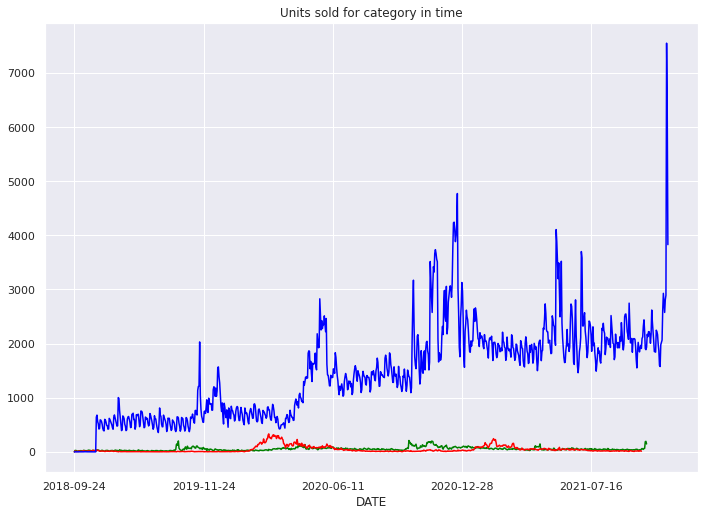

In [288]:
df_series.loc[df_series['CATEGORY']=='CATEG-1'].groupby('DATE')['UNITS_SOLD'].sum().plot(color='green', title='Units sold for category in time')
df_series.loc[df_series['CATEGORY']=='CATEG-2'].groupby('DATE')['UNITS_SOLD'].sum().plot(color='red')
df_series.loc[df_series['CATEGORY']=='CATEG-3'].groupby('DATE')['UNITS_SOLD'].sum().plot(color='blue')

* A categoria 3 parece ter uma **tendencia de crescimento** e aparentemente uma **sazonalidade** como podemos observar ao final do ano e na metade do ano.

* Tivemos um crescimento de unidades vendidas no final do ano para as categorias 1 e 3


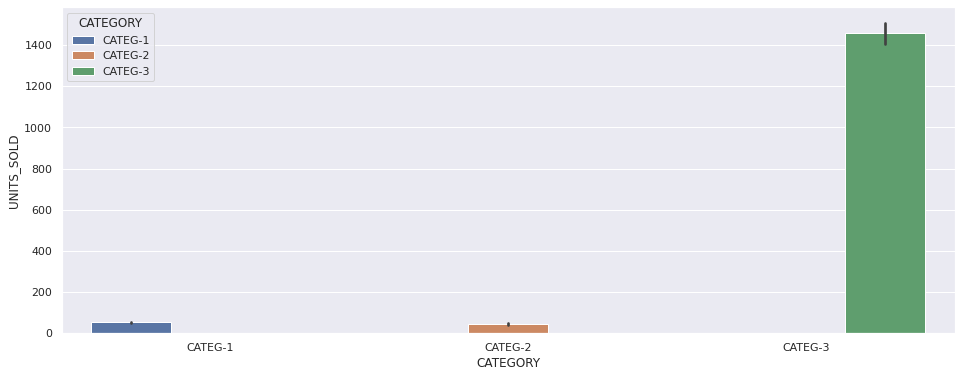

In [289]:
plt.figure(figsize=(16,6))
sns.barplot(data=df_series, x='CATEGORY', y='UNITS_SOLD', hue='CATEGORY')

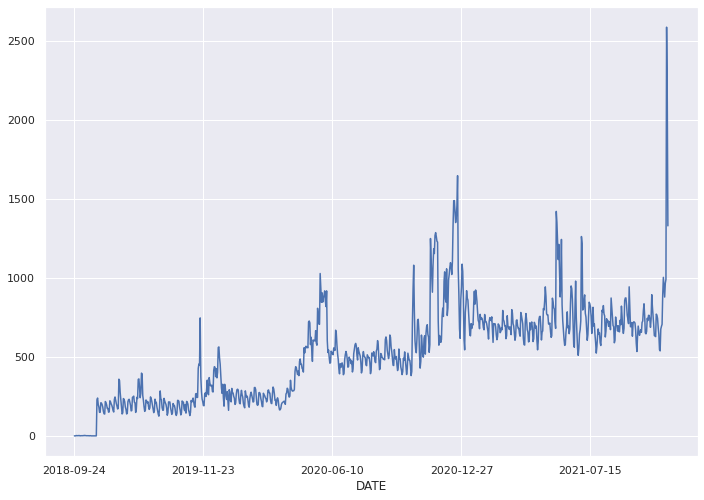

In [290]:
df_series.groupby(['DATE'])['UNITS_SOLD'].mean().plot()

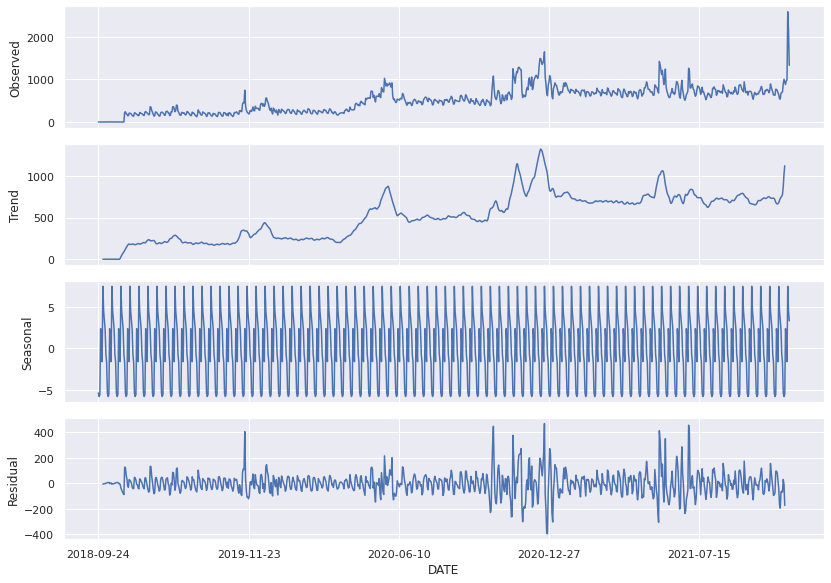

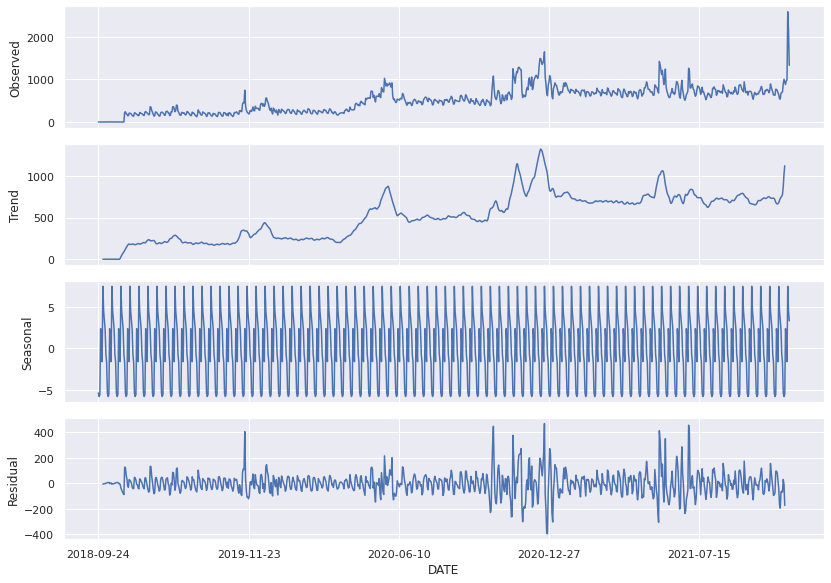

In [291]:
ts = df_series.groupby("DATE")['UNITS_SOLD'].mean()
res = seasonal_decompose(ts,freq=12,model="adtive")
res.plot()

Também já conseguimos notar que nossa serie não é estacionaria, mas por via das dúvidas vamos rodar o teste Dickey-Fuller. 

In [292]:
### O proposito disso é para ficar mais facil quando eu for juntar os resultados das series
dummy = pd.get_dummies(df_series['CATEGORY'])
df_series = pd.concat([df_series, dummy], axis=1).set_index("DATE").sort_values(by='DATE')
df_series.drop(columns="CATEGORY", inplace=True)

In [293]:
ts1 = df_series.loc[df_series['CATEG-1']==1].groupby("DATE")['UNITS_SOLD'].mean().dropna()
ts2 = df_series.loc[df_series['CATEG-2']==1].groupby("DATE")['UNITS_SOLD'].mean().dropna()
ts3 = df_series.loc[df_series['CATEG-3']==1].groupby("DATE")['UNITS_SOLD'].mean().dropna()

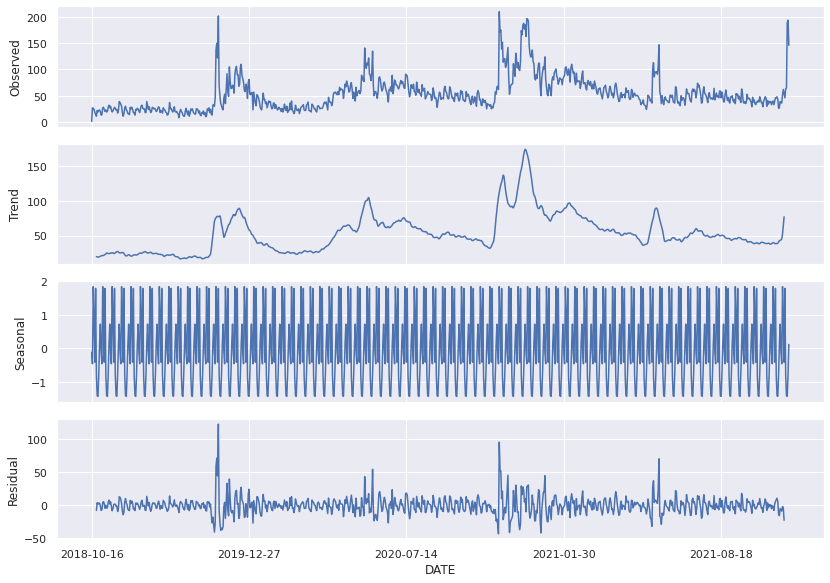

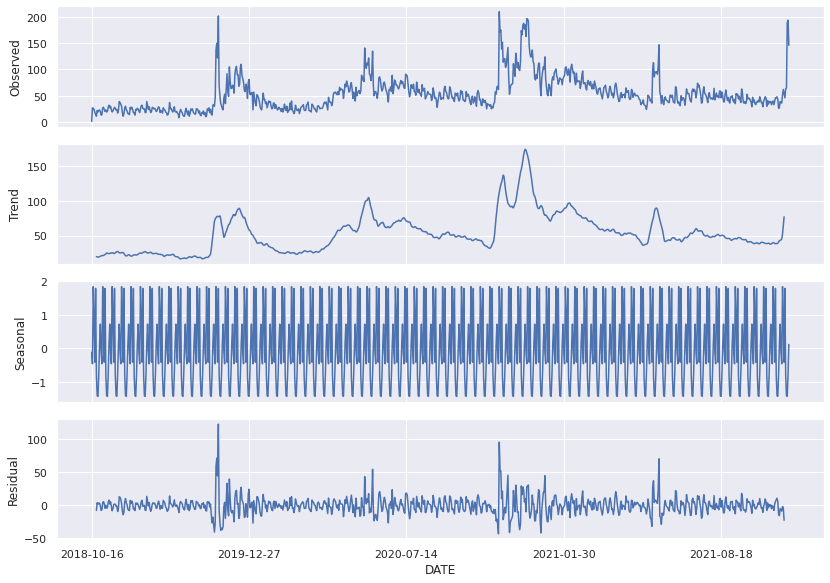

In [294]:
seasonal_decompose(ts1,freq=12,model="adtive").plot()

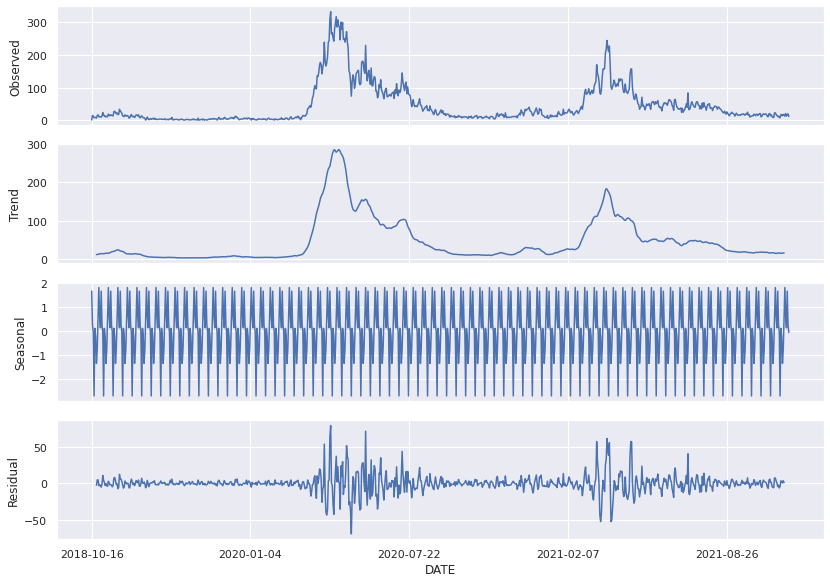

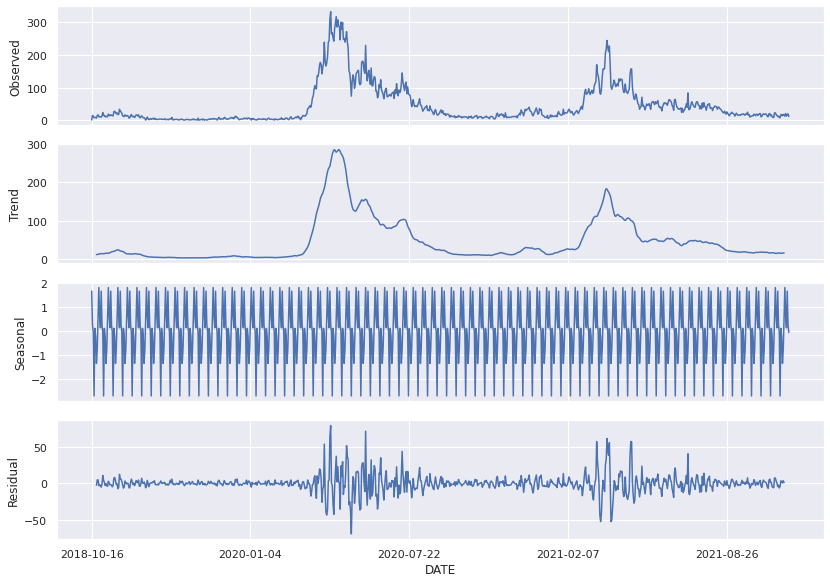

In [295]:
seasonal_decompose(ts2,freq=12,model="adtive").plot()

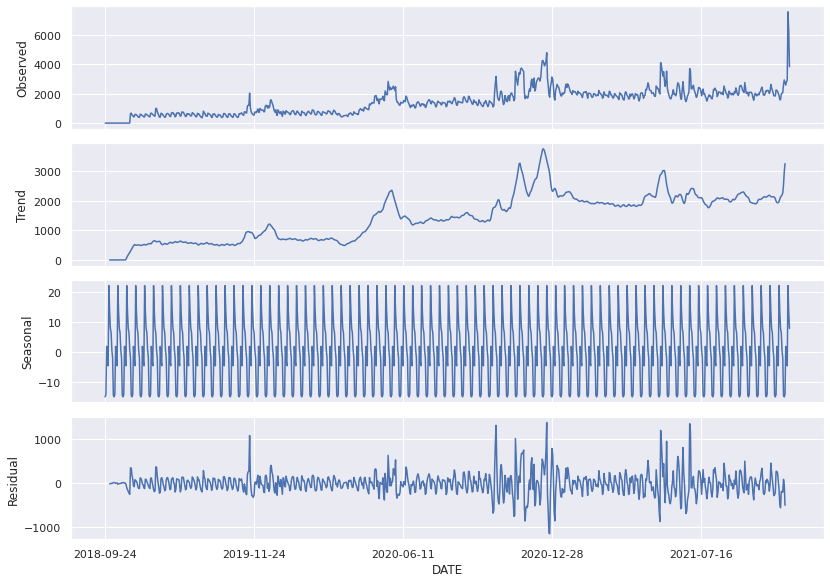

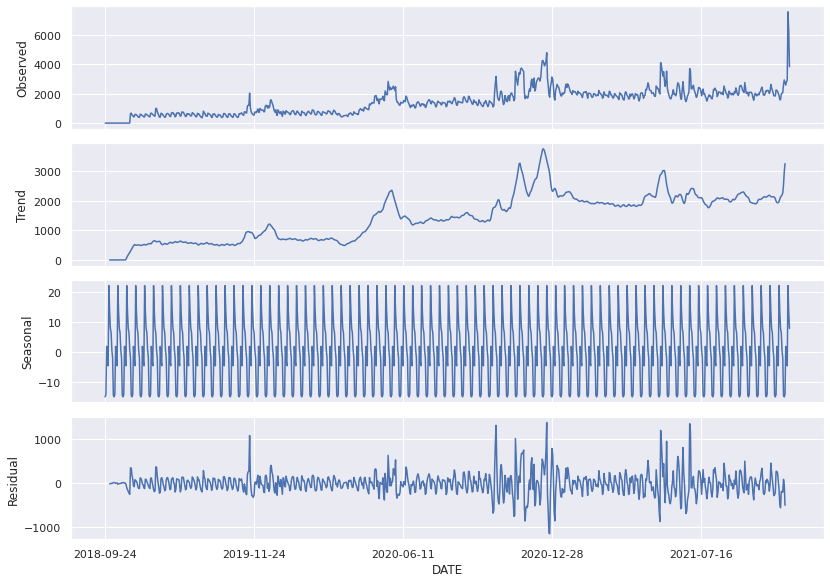

In [296]:
seasonal_decompose(ts3,freq=12,model="adtive").plot()

### O que sabemos até o momento
  * Se considerarmos cada categoria como uma serie, percebemos que há muita diferença entre elas. A categoria 1 e 3 apresentam uma tendência aparente de crescimento, enquanto que a 2 se mantem estavel. 
  * Além disso a categoria 3 parece ter ciclos.

## Modelando

In [297]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [298]:
test_stationarity(ts) #Ts é a serie completa

Results of Dickey-Fuller Test:
Test Statistic                  -1.628684
p-value                          0.468179
#Lags Used                      15.000000
Number of Observations Used    905.000000
Critical Value (1%)             -3.437596
Critical Value (5%)             -2.864739
Critical Value (10%)            -2.568473
dtype: float64


In [299]:
test_stationarity(ts3) #Ts3 é a serie da categoria 3

Results of Dickey-Fuller Test:
Test Statistic                  -1.517778
p-value                          0.524699
#Lags Used                      15.000000
Number of Observations Used    904.000000
Critical Value (1%)             -3.437604
Critical Value (5%)             -2.864742
Critical Value (10%)            -2.568475
dtype: float64


In [300]:
test_stationarity(ts2) #Ts2 é a serie da categoria 2

Results of Dickey-Fuller Test:
Test Statistic                  -2.783473
p-value                          0.060674
#Lags Used                      18.000000
Number of Observations Used    860.000000
Critical Value (1%)             -3.437977
Critical Value (5%)             -2.864907
Critical Value (10%)            -2.568563
dtype: float64


In [301]:
test_stationarity(ts1) #Ts1 é a serie da categoria 1

Results of Dickey-Fuller Test:
Test Statistic                  -2.742632
p-value                          0.066947
#Lags Used                      21.000000
Number of Observations Used    865.000000
Critical Value (1%)             -3.437932
Critical Value (5%)             -2.864887
Critical Value (10%)            -2.568552
dtype: float64


Como imaginado, nenhuma serie passou no teste de Dickeyfuller, mas antes de lidarmos com isso, fiquei interessada em algo que li sobre os modelos ARIMA.

*A classe dos modelos ARIMA será capaz de descrever de maneira satisfatória séries estacionárias e não-estacionárias, que não tenham comportamento explosivo. Este tipo de não-estacionariedade é chamado de homogênea.*

Será que sem fazer a transformação já obteriamos resultados razoáveis com os ARIMA? :D

In [302]:
def split_train_test(df):
  cut_date = '2021-01-10'
  train = df.loc[df.index < cut_date]
  test = df.loc[df.index > cut_date]
  return train, test

In [303]:
ts_train, ts_test = split_train_test(df_series)
ts_train, ts_test = ts_train.groupby("DATE")['UNITS_SOLD'].mean(), ts_test.groupby("DATE")['UNITS_SOLD'].mean()

In [304]:
from statsmodels.tsa.arima_model import ARIMA

mod_arima = ARIMA(ts_train, order=(0,1,1))
mod_arima_fit = mod_arima.fit()

In [305]:
plot = go.Scatter(x=ts_train.index, y=ts_train.values, name='Série Temporal Original')
layout = go.Layout(xaxis=dict(title='Data'), yaxis=dict(title='Units sold'))
fig = go.Figure(data=[plot], layout=layout)

fig.add_trace(go.Scatter(x=ts_train.index, y=mod_arima_fit.predict(typ='levels'), name='Valores preditos'))

iplot(fig)

Confesso estar bastante surpresa agora

In [306]:
fc, se, conf = mod_arima_fit.forecast(steps=2021-11-12)

In [307]:
plot = go.Scatter(x=ts_train.index, y=ts_train.values, name='Treino')
layout = go.Layout(xaxis=dict(title='Date'), yaxis=dict(title='Unit Solds'))
fig = go.Figure(data=[plot], layout=layout)

fig.add_trace(go.Scatter(x=ts_test.index, y=ts_test.values, name='Teste'))
fig.add_trace(go.Scatter(x=ts_test.index, y=fc, name='Valores preditos'))

df = px.data.gapminder()

iplot(fig)

A alegria acabou, era só um teste que no final, parece não ter dado muito certo.
Vamos a estacionariedade.

In [308]:
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

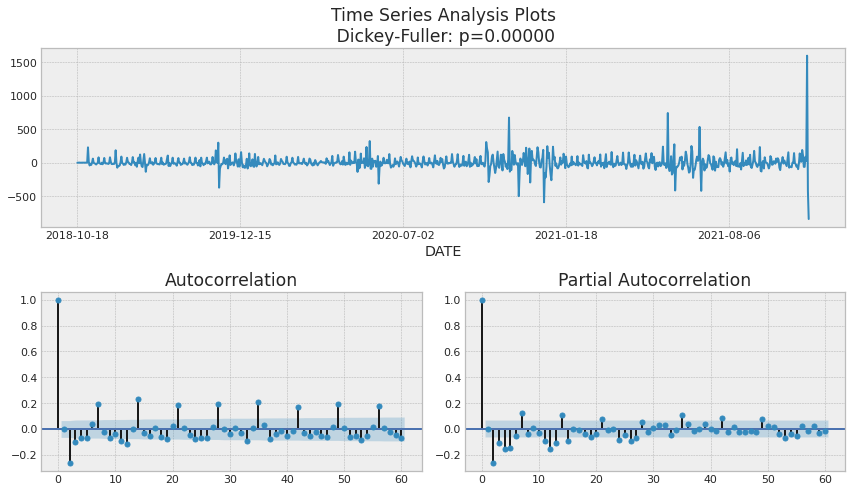

In [309]:
### usando metodo de diferenciação para transformar a serie
ads_diff = ts - ts.shift(1)
tsplot(ads_diff[21+1:], lags=60)

In [320]:
def plot_model(ts, model):
  plot = go.Scatter(x=ts.index, y=ts.values, name='Série Temporal')
  error = mean_absolute_percentage_error(ts.values, model[:len(ts)])
  layout = go.Layout(title="Mean Absolute Percentage Error: {0:.2f}%".format(error), xaxis=dict(title='Date'), yaxis=dict(title='Units sold'))
  fig = go.Figure(data=[plot], layout=layout)

  fig.add_trace(go.Scatter(x=ts.index, y=model, name='Pred'))

  iplot(fig)

In [311]:
model1 = Holt(ts).fit(optimized=True)
#Gerando as previsões
modelo1 = model1.forecast(len(ts))

In [321]:
plot_model(ts, modelo1) #HOLT 

In [322]:
plot_model(ts, fc) #ARIMA

In [335]:
model2 = SimpleExpSmoothing(ts).fit(smoothing_level=0.7,optimized=True)
modelo2 = model2.forecast(len(ts))

In [336]:
plot_model(ts, modelo2) #SimpleExpSmoothing MDS

In [337]:
model3 = ExponentialSmoothing(ts).fit(smoothing_level=0.5,optimized=True)
modelo3 = model3.forecast(len(ts))

In [338]:
plot_model(ts, modelo3) #ExponentialSmoothing MDS

### Metricas

In [339]:
print('Erro médio absoluto do Algoritmo Holt:',
      round(mean_absolute_error(ts, modelo1),3))
print('Raiz do erro médio quadrado do Algoritmo Holt',
      round(mean_squared_error(ts,modelo1)**0.5,3))
print('*'*100)
print('Erro médio absoluto do Algoritmo SimpleExpSmoothing:',
      round(mean_absolute_error(ts, modelo2),3))
print('Raiz do erro médio quadrado do Algoritmo SimpleExpSmoothing',
      round(mean_squared_error(ts,modelo2)**0.5,3))
print('*'*100)
print('Erro médio absoluto do Algoritmo ExponentialSmoothing:',
      round(mean_absolute_error(ts, modelo3),3))
print('Raiz do erro médio quadrado do Algoritmo ExponentialSmoothing',
      round(mean_squared_error(ts,modelo3)**0.5,3))

Erro médio absoluto do Algoritmo Holt: 1484.142
Raiz do erro médio quadrado do Algoritmo Holt 1503.525
****************************************************************************************************
Erro médio absoluto do Algoritmo SimpleExpSmoothing: 1061.332
Raiz do erro médio quadrado do Algoritmo SimpleExpSmoothing 1099.566
****************************************************************************************************
Erro médio absoluto do Algoritmo ExponentialSmoothing: 1135.932
Raiz do erro médio quadrado do Algoritmo ExponentialSmoothing 1171.967


### Conclusões e Pontos de melhoria

Modelagem
  * É necessário um tratamento de outliers, temos alguns pontos excendentes nas series que afeta o desempenho do modelo, tentei usar como métrica uma função que penaliza mais os outliers, mas só isso não é efetivo, é preciso trata-lós.
  * Poderiamos tentar melhorar a previsão fazendo a normalização da nossa serie. Para a serie 3 (Prevê resultados para categoria 3), existe muita diferença nas unidades vendidas por dia, talvez com a normalização pudessemos ter uma previsão melhor.
  * Poderiamos testar outras formas de transformar a serie em estacionaria (As que eu tentei não deu muito certo)
  * Dos algoritmos testados, todos foram ruins, o ARIMA pareceu o mais adequado, mas não consegui dar atenção para aprofundar nisso.
  * Poderia ter usado cross-validation, provavelmente seria mais efetivo.

Referencias para futuros estudos:

https://medium.com/horadecodar/

https://pandas.pydata.org/docs/user_guide/visualization.html

https://www.blackarbs.com/blog/time-series-analysis-in-python-linear-models-to-garch/11/1/2016#AR=

https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/

https://www.youtube.com/watch?v=W7S94pq5Xuo

https://opencodecom.net/post/2021-09-15-detectando-outliers/

https://ivanildo-batista13.medium.com/modelos-de-suaviza%C3%A7%C3%A3o-exponencial-em-python-c495a21d230b#:~:text=No%20algoritmo%20de%20suaviza%C3%A7%C3%A3o%20Holt,em%20uma%20parte%20da%20s%C3%A9rie)

https://otexts.com/fpp2/

